Открытие гугл диска

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
folder_path = '/content/drive/MyDrive/00' # замените "ваша_папка" на имя вашей папки
files = os.listdir(folder_path)
print(files)

['calib.txt', 'times.txt', '00.txt', 'image_0', 'image_1']


Получение временных меток

In [ ]:
file_path = '/content/drive/MyDrive/00/times.txt' # замените "ваш_файл.txt" на имя вашего файла
with open(file_path, 'r') as f:
    data = f.read()

print(type(data))
new_data = data.split()
print(new_data[:5])
times = [float(t) for t in new_data]
print(times[:5])

<class 'str'>
['0.000000e+00', '1.037359e-01', '2.073381e-01', '3.110752e-01', '4.146917e-01']
[0.0, 0.1037359, 0.2073381, 0.3110752, 0.4146917]


Получение меток позиции

In [ ]:
file_path = '/content/drive/MyDrive/00/00.txt' # замените "ваш_файл.txt" на имя вашего файла
with open(file_path, 'r') as f:
    data = f.read()
new_data = data.split()
# poses = [float(t) for t in new_data]
poses = []
one_photo = []
for i in range(len(new_data)):
  one_photo.append(float(new_data[i]))
  if (i+1) % 12 == 0:
    poses.append(one_photo)
    one_photo = []

print(poses[:5])

[[1.0, 9.04368e-12, 2.326809e-11, 5.551115e-17, 9.043683e-12, 1.0, 2.39237e-10, 3.330669e-16, 2.32681e-11, 2.39237e-10, 0.9999999, -4.440892e-16], [0.9999978, 0.0005272628, -0.002066935, -0.04690294, -0.0005296506, 0.9999992, -0.001154865, -0.02839928, 0.002066324, 0.001155958, 0.9999971, 0.8586941], [0.999991, 0.001048972, -0.004131348, -0.09374345, -0.001058514, 0.9999968, -0.002308104, -0.05676064, 0.004128913, 0.002312456, 0.9999887, 1.716275], [0.9999796, 0.001566466, -0.006198571, -0.1406429, -0.001587952, 0.9999927, -0.003462706, -0.08515762, 0.006193102, 0.003472479, 0.9999747, 2.574964], [0.9999637, 0.002078471, -0.008263498, -0.1874858, -0.002116664, 0.9999871, -0.004615826, -0.1135202, 0.008253797, 0.004633149, 0.9999551, 3.432648]]


Получение фото

In [ ]:
import os
import os.path

image_folder = '/content/drive/MyDrive/00/image_0' # замените на путь к вашей папке
image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.png')]
print(len(image_files)) # проверяем количество файлов
print(image_files[:5]) # проверяем первые 5 путей
image_files.sort()
print(image_files[:5])

4541
['/content/drive/MyDrive/00/image_0/003541.png', '/content/drive/MyDrive/00/image_0/003545.png', '/content/drive/MyDrive/00/image_0/003544.png', '/content/drive/MyDrive/00/image_0/003542.png', '/content/drive/MyDrive/00/image_0/003543.png']
['/content/drive/MyDrive/00/image_0/000000.png', '/content/drive/MyDrive/00/image_0/000001.png', '/content/drive/MyDrive/00/image_0/000002.png', '/content/drive/MyDrive/00/image_0/000003.png', '/content/drive/MyDrive/00/image_0/000004.png']


In [ ]:
from PIL import Image
import numpy as np

images = []
# i = 0
for file_path in image_files:
    try:
        img = Image.open(file_path)
        # print(i)
        # i+= 1
        img_array = np.array(img)  # Преобразуем изображение в массив numpy
        images.append(img_array)
    except Exception as e:
        print(f"Ошибка при загрузке {file_path}: {e}")

images = np.array(images) # преобразуем в numpy массив
print(images.shape) # проверяем размерность массива

(4541, 376, 1241)


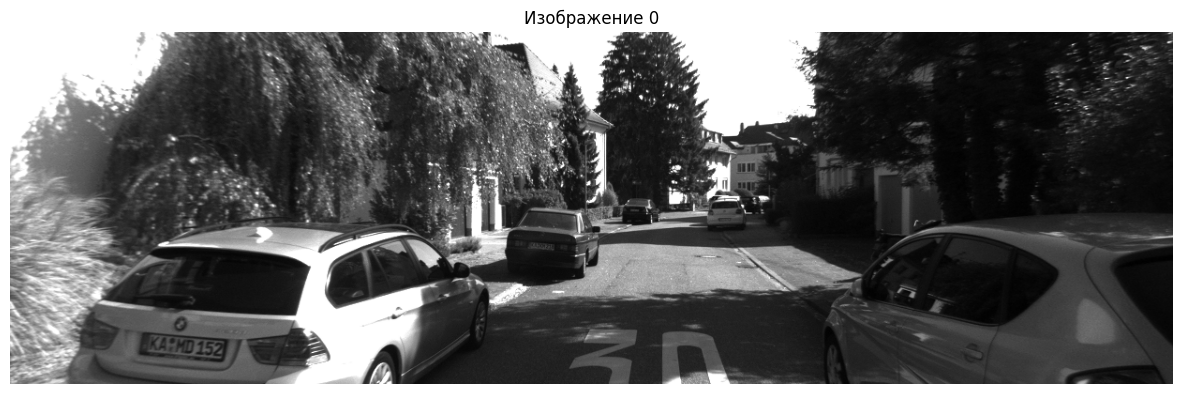

In [ ]:
import matplotlib.pyplot as plt
num_images_to_show = min(1, len(images)) # Покажем не больше 5 изображений

plt.figure(figsize=(15, 5)) # Установим размер фигуры

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i+1 ) # Создаем подграфик
    plt.imshow(images[124], cmap='gray') # Отображаем изображение
    plt.title(f"Изображение {i}") # Устанавливаем заголовок
    plt.axis('off') # Отключаем оси

plt.show() # Отображаем график

In [ ]:
import os
import numpy as np
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader

class ImageDataset(Dataset):
    def __init__(self, image_folder, labels):
        self.image_folder = image_folder
        self.image_files = [file for file in os.listdir(image_folder) if file.endswith('.png')]
        self.labels = labels

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_folder, self.image_files[idx])
        image = Image.open(image_path) # Преобразуем в RGB
        image = np.array(image) / 255.0 # Нормализуем
        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0) # Преобразуем в тензор и меняем размерность

        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return image, label

# Создадим примеры меток (замените на ваши реальные метки)
labels = np.random.randint(0, 10, len(os.listdir('/content/drive/MyDrive/00/image_0')))

dataset = ImageDataset('/content/drive/MyDrive/00/image_0', labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(932480, 128) # Измените размер в зависимости от размера изображений
        self.fc2 = nn.Linear(128, 10) # 10 классов

    def forward(self, x):
        # print(x.shape)
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1): # 5 эпох
    for images, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Эпоха {epoch+1}, потеря: {loss.item():.4f}')

print('Обучение завершено!')

torch.Size([32, 1, 376, 1241])


KeyboardInterrupt: 

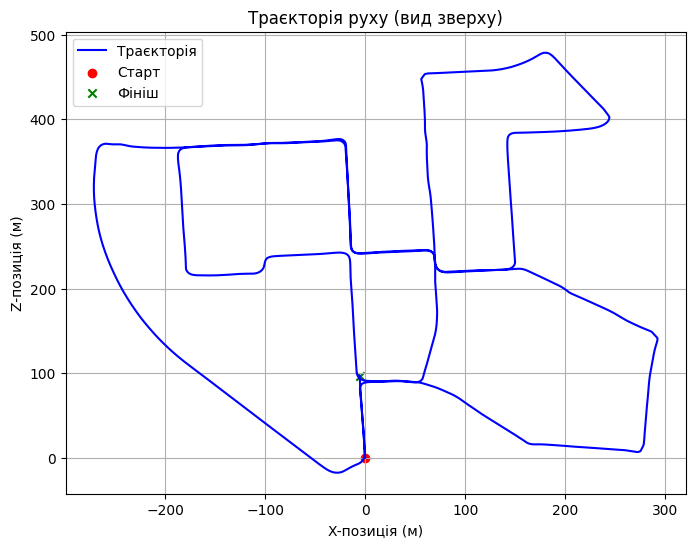

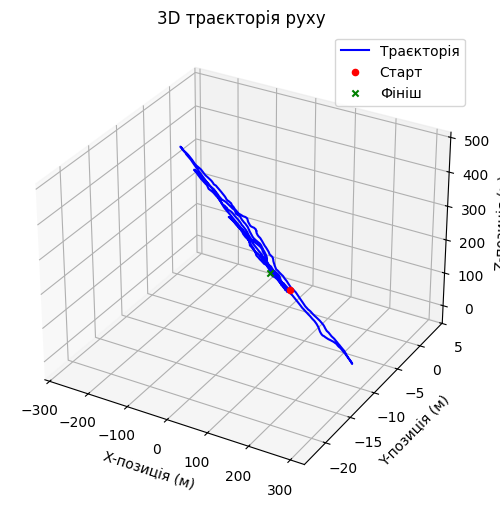

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Файл з траєкторією (заміни XX на потрібний номер послідовності)
poses_file = "/content/drive/MyDrive/00/00.txt"

# Завантажуємо всі рядки
poses = np.loadtxt(poses_file)

# Отримуємо координати (tx, ty, tz)
tx = poses[:, 3]   # X-координата
ty = poses[:, 7]   # Y-координата
tz = poses[:, 11]  # Z-координата

# Малюємо траєкторію в 2D (вид зверху)
plt.figure(figsize=(8, 6))
plt.plot(tx, tz, label="Траєкторія", color="blue")
plt.scatter(tx[0], tz[0], color="red", marker="o", label="Старт")
plt.scatter(tx[-1], tz[-1], color="green", marker="x", label="Фініш")
plt.xlabel("X-позиція (м)")
plt.ylabel("Z-позиція (м)")
plt.title("Траєкторія руху (вид зверху)")
plt.legend()
plt.grid()
plt.show()

# Побудова 3D-траєкторії
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(tx, ty, tz, label="Траєкторія", color="blue")
ax.scatter(tx[0], ty[0], tz[0], color="red", marker="o", label="Старт")
ax.scatter(tx[-1], ty[-1], tz[-1], color="green", marker="x", label="Фініш")
ax.set_xlabel("X-позиція (м)")
ax.set_ylabel("Y-позиція (м)")
ax.set_zlabel("Z-позиція (м)")
ax.set_title("3D траєкторія руху")
ax.legend()
plt.show()


In [ ]:
def create_movements(movements_file):
  movements = []
  with open(movements_file, 'r') as f:
      for line in f:
          data = line.strip().split()
          movements.append([float(x) for x in data])
  return movements

# mov = test('/content/drive/MyDrive/00/00.txt')
# new_mov = torch.tensor(mov)
# print(new_mov.shape)

def transform_mov(movements):
  new_movements =  []
  for matrix in movements:
    # print(matrix.shape)
    new_matrix = [
        matrix[0:4].tolist(),
        matrix[4:8].tolist(),
        matrix[8:12].tolist(),
        [0,0,0,1]
        ]
    new_matrix = torch.tensor(new_matrix)
    new_movements.append(new_matrix)
    # print(new_matrix.shape)
    # print(new_matrix)
  res_movements = []
  for i in range(len(new_movements)-1):
    T1_inv = torch.linalg.inv(new_movements[i])
    T_rel = torch.matmul(new_movements[i+1], T1_inv)
    # print(T_rel)
    res_matrix = T_rel[:3]
    # print(res)
    res_matrix = torch.cat([ res_matrix[0],  res_matrix[1],  res_matrix[2]])
    res_movements.append(res_matrix)
    # print(res)
  return res_movements

# transform_mov(new_mov)

In [ ]:
import os
import numpy as np
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader

class CameraMovementDataset(Dataset):
    def __init__(self, image_folder, movements_file):
        self.image_folder = image_folder
        self.movements = []
        mov = create_movements(movements_file)
        mov = torch.tensor(mov)
        self.movements = transform_mov(mov)


    def __len__(self):
        return len(self.movements)

    def __getitem__(self, idx):
        image1_path = os.path.join(self.image_folder, f"{idx:06d}.png") # Предполагаем, что изображения называются image_0.png, image_1.png, ...
        image2_path = os.path.join(self.image_folder, f"{idx+1:06d}.png")

        image1 = Image.open(image1_path).convert('L') # Открываем в оттенках серого
        image2 = Image.open(image2_path).convert('L')

        image1 = np.array(image1, dtype=np.float32) / 255.0
        image2 = np.array(image2, dtype=np.float32) / 255.0

        image1 = torch.tensor(image1, dtype=torch.float32).unsqueeze(0) # Добавляем размерность канала
        image2 = torch.tensor(image2, dtype=torch.float32).unsqueeze(0)

        movement = torch.tensor(self.movements[idx], dtype=torch.float32)

        return (image1, image2), movement

dataset = CameraMovementDataset('/content/drive/MyDrive/00/image_0/', '/content/drive/MyDrive/00/00.txt')
dataloader = DataLoader(dataset, batch_size=8, shuffle = True)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CameraMovementModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 188x620

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 94x310

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 47x155

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((8, 8))  # Глобальный пуллинг к фиксированному размеру
        )


        self.network = nn.Sequential(
            nn.Linear(2 * 256 * 8 * 8, 512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(256, 12),
        )


    def forward(self,image1,image2):
        out_features1 = self.features(image1)
        out_features2 = self.features(image2)

        out_features1 = torch.flatten(out_features1, 1) # Flatten all dimensions except batch
        out_features2 = torch.flatten(out_features2, 1)

        out_features = torch.cat((out_features1,out_features2),dim = 1 )
        out = self.network(out_features)
        return out


model = CameraMovementModel()
model = model.to(device)

In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(3):
    for (images1,images2), movements in dataloader:
        images1 = images1.to(device)
        images2 = images2.to(device)
        movements = movements.to(device)
        optimizer.zero_grad()
        outputs = model(images1,images2)
        loss = criterion(outputs, movements)
        loss.backward()
        optimizer.step()
    print(f'Эпоха {epoch+1}, потеря: {loss.item():.4f}')

print('Обучение завершено!')

<ipython-input-3-6ce852d12926>:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  movement = torch.tensor(self.movements[idx], dtype=torch.float32)


Эпоха 1, потеря: 2.2796
Эпоха 2, потеря: 0.2056
Эпоха 3, потеря: 0.1310
Обучение завершено!


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 17,300,940 trainable parameters


In [ ]:
torch.cuda.empty_cache()


In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   39G   70G  36% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
/dev/sda1        85G   66G   19G  78% /kaggle/input
tmpfs           6.4G   11M  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  4.5G   11G  30% /content/drive


In [ ]:
!ls -l '/content/drive/MyDrive/00/image_0/'

total 1161855
-rw------- 1 root root 277498 Jan  9  2012 000000.png
-rw------- 1 root root 273625 Jan  9  2012 000001.png
-rw------- 1 root root 274770 Jan  9  2012 000002.png
-rw------- 1 root root 275941 Jan  9  2012 000003.png
-rw------- 1 root root 277555 Jan  9  2012 000004.png
-rw------- 1 root root 277226 Jan  9  2012 000005.png
-rw------- 1 root root 276955 Jan  9  2012 000006.png
-rw------- 1 root root 278395 Jan  9  2012 000007.png
-rw------- 1 root root 278886 Jan  9  2012 000008.png
-rw------- 1 root root 277526 Jan  9  2012 000009.png
-rw------- 1 root root 275347 Jan  9  2012 000010.png
-rw------- 1 root root 273715 Jan  9  2012 000011.png
-rw------- 1 root root 270086 Jan  9  2012 000012.png
-rw------- 1 root root 267990 Jan  9  2012 000013.png
-rw------- 1 root root 261978 Jan  9  2012 000014.png
-rw------- 1 root root 256589 Jan  9  2012 000015.png
-rw------- 1 root root 255789 Jan  9  2012 000016.png
-rw------- 1 root root 258555 Jan  9  2012 000017.png
-rw------- 1 r